# Regresión Multiple con SciKit-Learn

Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Recuperar los datos

In [4]:
df = pd.read_csv("Advertising.csv",index_col=0)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


¿Qué relación existe entre cada uno de los canales de publicidad y las ventas?

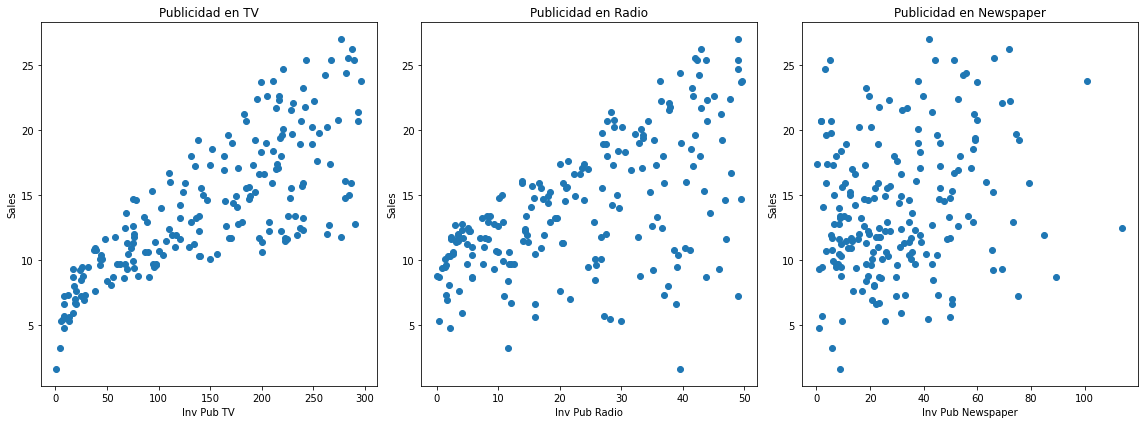

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_xlabel("Inv Pub TV")
axes[0].set_title("Publicidad en TV");

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_ylabel("Sales")
axes[1].set_xlabel("Inv Pub Radio")
axes[1].set_title("Publicidad en Radio");

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_xlabel("Inv Pub Newspaper")
axes[2].set_ylabel("Sales")
axes[2].set_title("Publicidad en Newspaper");

plt.tight_layout();

Relación entre todas las características

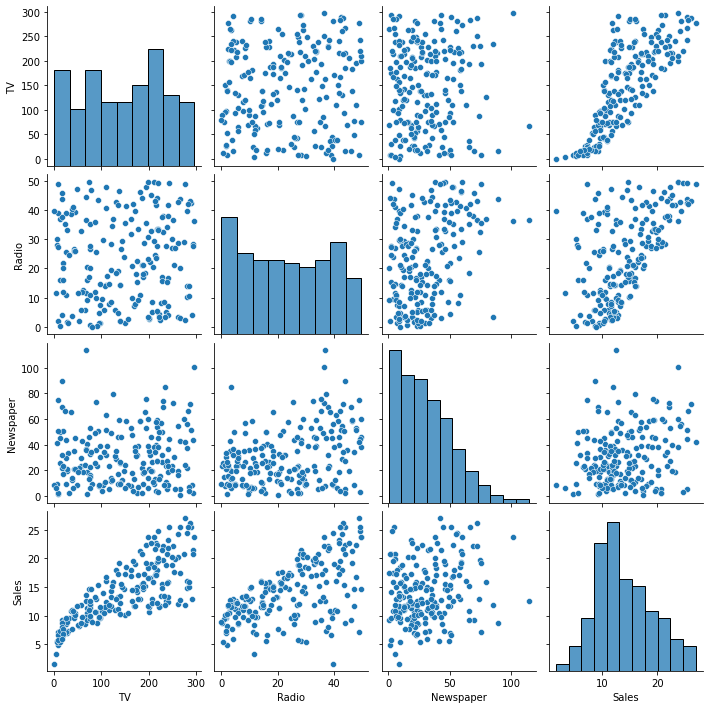

In [15]:
sns.pairplot(df)

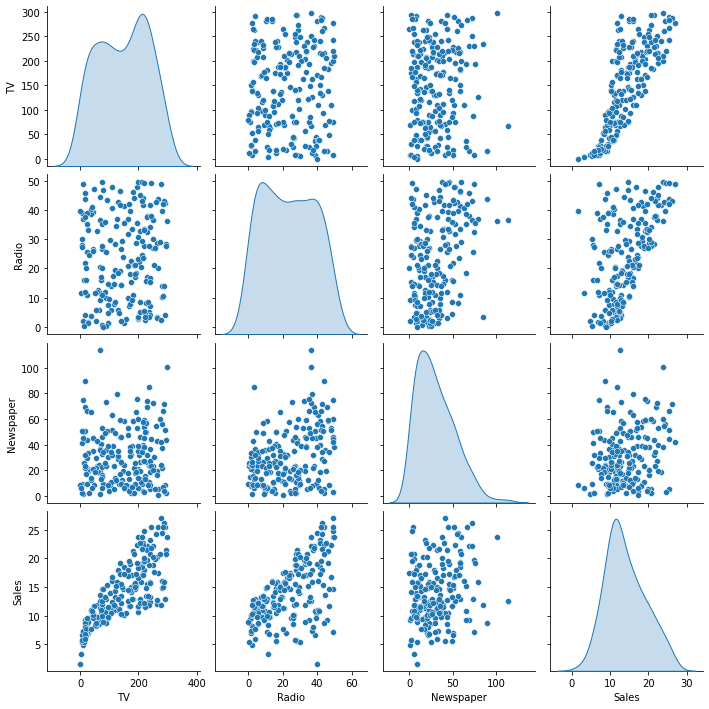

In [7]:
sns.pairplot(df,diag_kind='kde')

### Uso de SciKit Learn

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
#X = df[['TV', 'Radio', 'Newspaper']]
X = df.drop('Sales',axis=1)

In [10]:
y = df['Sales']

In [12]:
type(y)

pandas.core.series.Series

#### Selección del Conjunto de datos de entrenamiento y prueba

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                   random_state=101)

In [15]:
X_train

,TV,Radio,Newspaper
86,193.2,18.4,65.7
184,287.6,43.0,71.8
128,80.2,0.0,9.2
54,182.6,46.2,58.7
101,222.4,4.3,49.8
...,...,...,...
64,102.7,29.6,8.4
71,199.1,30.6,38.7
82,239.8,4.1,36.9
12,214.7,24.0,4.0


In [16]:
y_train

86     15.2
184    26.2
128     8.8
54     21.2
101    11.7
       ... 
64     14.0
71     18.3
82     12.3
12     17.4
96     16.9
Name: Sales, Length: 140, dtype: float64

In [17]:
X_test

,TV,Radio,Newspaper
38,74.7,49.4,45.7
110,255.4,26.9,5.5
32,112.9,17.4,38.6
90,109.8,47.8,51.4
67,31.5,24.6,2.2
120,19.4,16.0,22.3
55,262.7,28.8,15.9
75,213.4,24.6,13.1
146,140.3,1.9,9.0
143,220.5,33.2,37.9


In [18]:
y_test

38     14.7
110    19.8
32     11.9
90     16.7
67      9.5
120     6.6
55     20.2
75     17.0
146    10.3
143    20.1
149    10.9
113    14.1
175    11.5
56     23.7
142    19.2
150    10.1
26     12.0
35      9.5
171     8.4
40     21.5
173     7.6
154    19.0
176    27.0
62     24.2
66      9.3
51     11.4
43     20.7
130     9.7
180    12.6
3       9.3
13      9.2
134    19.6
91     11.2
23      5.6
42     17.1
33      9.6
126    10.6
197     9.7
159     7.3
181    10.5
17     12.5
187    10.3
145    11.4
122     7.0
81     11.8
19     11.3
79      5.3
49     14.8
5      12.9
16     22.4
2      10.4
44     12.9
103    14.8
165    11.9
10     10.6
156     3.2
37     25.4
191    10.8
34     17.4
46     14.9
Name: Sales, dtype: float64

#### Modelo (Estimador) de Regresión Lineal 

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [21]:
modelo = LinearRegression()

Entrenar el modelo

In [22]:
modelo.fit(X_train,y_train)

LinearRegression()

In [23]:
modelo.intercept_

3.1515267680706547

In [24]:
modelo.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])